In [ ]:
import pandas as pd

background = pd.read_csv('../data/background-clean.csv')
interest = pd.read_csv('../data/interest-clean.csv')
merge = pd.merge(background, interest, on='response_id', how='left')

['response_id',
 'prog.prof',
 'prog.comf',
 'math.prof',
 'math.comf',
 'stat.prof',
 'stat.comf',
 'updv.num',
 'dom_x',
 'do_you_have_any_preference_regarding_working_on_an_industry_project_or_a_research_lab_project',
 'PSTAT100',
 'PSTAT115',
 'PSTAT120',
 'PSTAT122',
 'PSTAT126',
 'PSTAT131',
 'PSTAT160',
 'PSTAT174',
 'CS9',
 'CS16',
 'LING104',
 'LING110',
 'LING111',
 'CS130',
 'CS165',
 'ECON145',
 'PSTAT127',
 'PSTAT134',
 'CS5',
 'rsrch',
 'type',
 'lang',
 'dom_y',
 'area']

In [12]:
#merge['lang']
#merge['dom_y']
merge['dom_y']

0           Environmental science;Biology;Public health
1     Ecology;Biology;Public health;Neuroscience;Tec...
2     Social or political science;Technology;Softwar...
3                       Technology;Software development
4     Social or political science;Neuroscience;Techn...
5     Environmental science;Public health;Neuroscien...
6     Technology;Software development;media/musical ...
7     Biology;Public health;Neuroscience;Technology;...
8     Social or political science;Technology;Softwar...
9     Environmental science;Social or political scie...
10                   Biology;Public health;Neuroscience
11    Environmental science;Social or political scie...
12                                                  NaN
13    Environmental science;Public health;Neuroscien...
14    Environmental science;Social or political scie...
15         Neuroscience;Technology;Software development
16    Public health;Neuroscience;Technology;Software...
17                      Technology;Software deve

In [18]:
merge.dom_y = merge.dom_y.str.split(';')
merge = merge.explode('dom_y')

In [ ]:
merge[['dom_y', 'lang']]

,response_id,prog.prof,prog.comf,math.prof,math.comf,stat.prof,stat.comf,updv.num,dom_x,do_you_have_any_preference_regarding_working_on_an_industry_project_or_a_research_lab_project,...,CS165,ECON145,PSTAT127,PSTAT134,CS5,rsrch,type,lang,dom_y,area
0,1,adv,5,int,4,adv,5,9+,Yes,No preference,...,0,0,0,0,0,True,both,R,Environmental science,Deep learning and neural networks;Spatial stat...
0,1,adv,5,int,4,adv,5,9+,Yes,No preference,...,0,0,0,0,0,True,both,R,Biology,Deep learning and neural networks;Spatial stat...
0,1,adv,5,int,4,adv,5,9+,Yes,No preference,...,0,0,0,0,0,True,both,R,Public health,Deep learning and neural networks;Spatial stat...
1,2,adv,5,int,4,adv,4,6-8,No,I'm more interested in an industry project,...,0,0,0,0,0,True,ind,Python,Ecology,Analysis or classification of images;Deep lear...
1,2,adv,5,int,4,adv,4,6-8,No,I'm more interested in an industry project,...,0,0,0,0,0,True,ind,Python,Biology,Analysis or classification of images;Deep lear...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,55,int,4,adv,5,adv,5,9+,No,I'm more interested in an industry project,...,1,0,0,1,0,True,ind,Python,Music & Audio,Deep learning and neural networks;Spatial stat...
49,56,int,3,int,3,int,4,3-5,Yes,I'm more interested in an industry project,...,0,0,0,0,0,True,ind,Python,Environmental science,Deep learning and neural networks;Spatial stat...
49,56,int,3,int,3,int,4,3-5,Yes,I'm more interested in an industry project,...,0,0,0,0,0,True,ind,Python,Public health,Deep learning and neural networks;Spatial stat...
50,59,adv,5,int,4,adv,4,9+,Unsure,I'm more interested in a research lab project,...,0,0,0,0,0,False,lab,Python,Technology,Deep learning and neural networks;Natural lang...


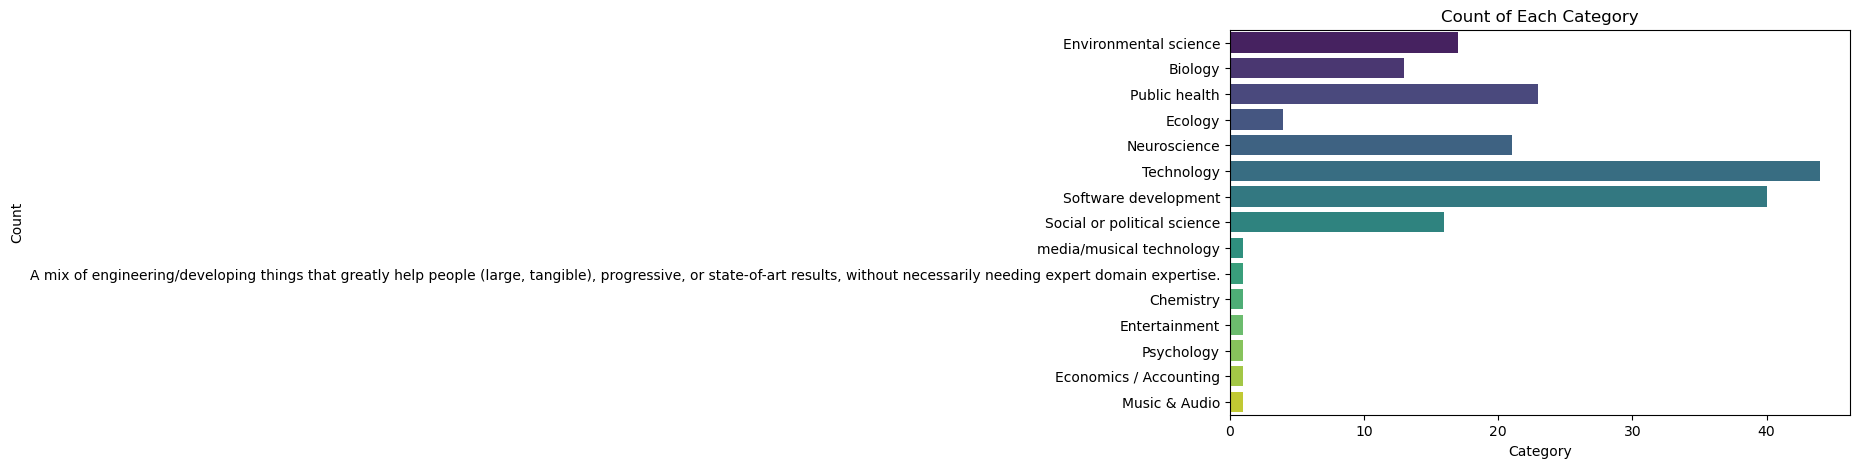

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data


# Create a countplot
plt.figure(figsize=(8, 5))
sns.countplot(y='dom_y', data=merge, palette='viridis') # 'x' specifies the categorical column
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [45]:
science = ['Environmental science', 'Biology', 'Public health', 'Ecology', 'Neuroscience', 'Psychology', 'Chemistry']
tech = ['Technology', 'Software development', 'media/musical technology', 'Music & Audio']
social = ['Social or political science', 'Entertainment', 'Economics / Accounting']

dom_map = {'Environmental science': 'science', 'Biology': 'science', 'Public health': 'science', 'Ecology': 'science',
'Neuroscience': 'science', 'Psychology': 'science', 'Chemistry': 'science',

'Technology': 'tech', 'Software development': 'tech', 'media/musical technology':'tech', 'Music & Audio': 'tech',
'Social or political science':'science', 'Entertainment':'tech','Economics / Accounting': 'science'


}

merge['domain'] = merge['dom_y'].map(dom_map)
merge['domain']

0     science
0     science
0     science
1     science
1     science
       ...   
48       tech
49    science
49    science
50       tech
50       tech
Name: domain, Length: 187, dtype: object

<Axes: xlabel='count', ylabel='domain'>

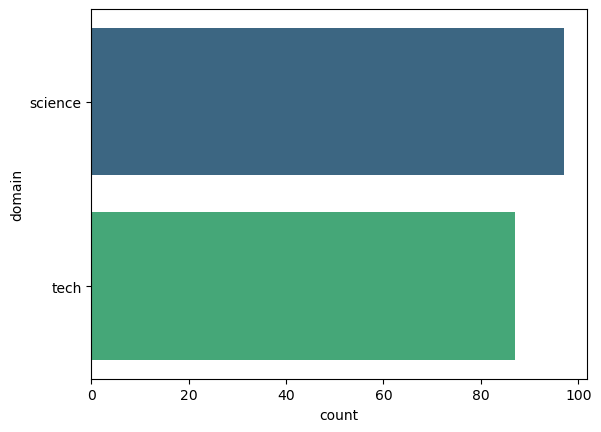

In [46]:
sns.countplot(y='domain', data=merge, palette='viridis')

<Axes: xlabel='count', ylabel='lang'>

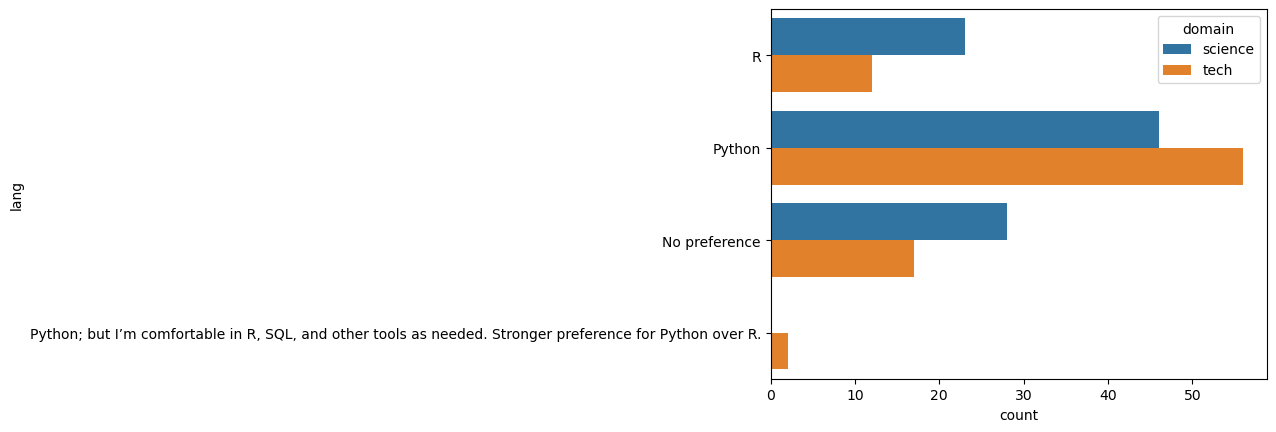

In [47]:
sns.countplot(y='lang', data=merge, hue='domain')

In [ ]:
df_filtered = merge[merge['lang'].isin(['R', 'Python', 'No preference'])]
df_filtered = df_filtered[df_filtered['domain'].isin(['science', 'tech'])]

lang_map = {'R': 0, 'Python': 1, 'No preference': 2}
domain_map = {'science': 0, 'tech': 1}

df_binarized = df_filtered
df_binarized['domain'] = df_binarized['domain'].map(domain_map)
df_binarized['lang'] = df_binarized['lang'].map(lang_map)
df_binarized[['domain', 'lang']]

,domain,lang
0,0,0
0,0,0
0,0,0
1,0,1
1,0,1
...,...,...
48,1,1
49,0,1
49,0,1
50,1,1


In [58]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Prepare the dataset
# Generate some synthetic data for demonstration
# X: feature (e.g., tumor size), y: target (0 for benign, 1 for malignant)

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.array(df_binarized['lang']).reshape(-1, 1), df_binarized['domain'], test_size=0.3, random_state=42)

# 3. Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Optional: Predict probabilities
y_prob = model.predict_proba(X_test)
print(f"Predicted probabilities for test set:\n{y_prob}")

# Optional: Get coefficients and intercept
print(f"Coefficient: {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")

Model Accuracy: 0.64
Predicted probabilities for test set:
[[0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.61300081 0.38699919]
 [0.61300081 0.38699919]
 [0.61300081 0.38699919]
 [0.61300081 0.38699919]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.61300081 0.38699919]
 [0.61300081 0.38699919]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.61300081 0.38699919]
 [0.61300081 0.38699919]
 [0.61300081 0.38699919]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.48649301 0.51350699]
 [0.61300081 0.3

In [59]:
import statsmodels.api as sm

ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (/Users/emilytian/anaconda3/lib/python3.11/site-packages/scipy/_lib/_util.py)